<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20MNB-MLP%20for%2010%20class%20classifications%20based%20on%20UNSW-NB15%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid MNB-MLP for 10 class classifications based on UNSW-NB15 dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load dataset
dataset = pd.read_csv("dataset_P2.2.csv")
dataset.isnull().sum()

id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
Class                0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=10)
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X.shape)
print(y.shape)

(175341, 40)
(175341, 10)


In [5]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [7]:
# Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, np.argmax(y_train, axis=1))

y_pred_mnb = mnb.predict(X_test)
y_pred_mnb = np_utils.to_categorical(y_pred_mnb, num_classes=10)

from sklearn.metrics import accuracy_score

# Calculate accuracy for Multinomial Naive Bayes model
accuracy_mnb = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred_mnb, axis=1))
print("Multinomial Naive Bayes Accuracy:", accuracy_mnb)

Multinomial Naive Bayes Accuracy: 0.1998125


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from keras.utils import to_categorical

# MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train, np.argmax(y_train, axis=1))

y_pred_mlp = mlp_model.predict(X_test)
y_pred_mlp = to_categorical(y_pred_mlp, num_classes=10)

# Evaluate the MLP model
mlp_report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred_mlp, axis=1))
print("MLP Model Classification Report:")
print(mlp_report)

MLP Model Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.26      0.41     11277
           1       0.18      0.03      0.05     11343
           2       0.54      0.03      0.05     11225
           3       0.54      0.01      0.01     11219
           4       0.24      0.02      0.04     11297
           5       0.46      0.02      0.04     11174
           6       0.00      0.00      0.00     11074
           7       0.12      0.00      0.00     11129
           8       0.11      1.00      0.19     11112
           9       0.00      0.00      0.00     11150

    accuracy                           0.14    112000
   macro avg       0.31      0.14      0.08    112000
weighted avg       0.31      0.14      0.08    112000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.utils import np_utils

# Combine models
y_pred = y_pred_mnb * 0.6 + y_pred_mlp * 0.4
y_pred = np.argmax(y_pred, axis=1)

# Evaluation metrics
print(classification_report(np.argmax(y_test, axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.21      0.62      0.32     11277
           1       0.00      0.00      0.00     11343
           2       0.00      0.00      0.00     11225
           3       0.40      0.00      0.01     11219
           4       0.08      0.00      0.00     11297
           5       0.00      0.00      0.00     11174
           6       0.18      0.99      0.30     11074
           7       0.00      0.00      0.00     11129
           8       0.18      0.00      0.00     11112
           9       0.25      0.39      0.30     11150

    accuracy                           0.20    112000
   macro avg       0.13      0.20      0.09    112000
weighted avg       0.13      0.20      0.09    112000

[[ 7040    11     0     1    11     0  2027     0     0  2187]
 [ 2107     0     0    14     0     0  8127     0     0  1095]
 [ 1087     0     0    25     0     0  9520     0     0   593]
 [ 1356     0     0    43     0     0  9083     0   

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(8,6.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  ax.yaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])

  plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid MNB-MLP Model


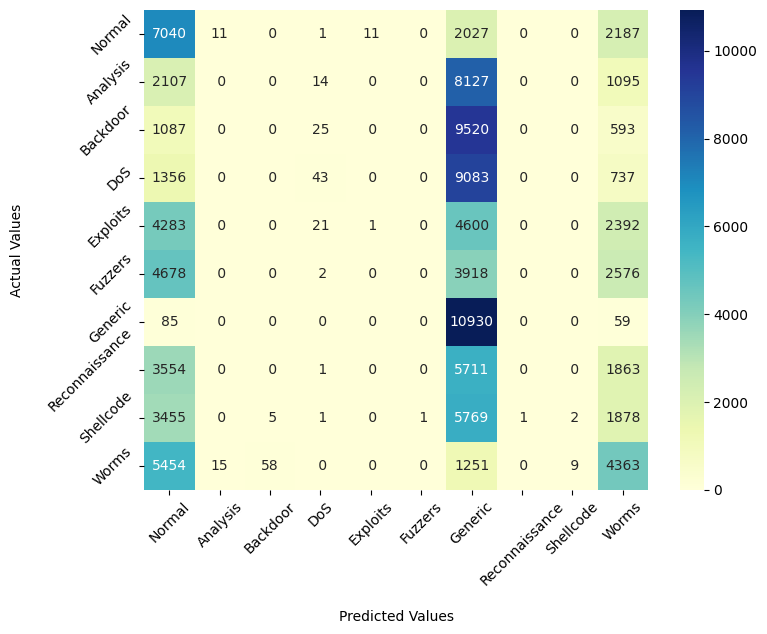

In [11]:
print("Confusion Matrix of Hybrid MNB-MLP Model") 
conf_mat(np.argmax(y_test, axis=1), y_pred)

In [12]:
report = classification_report(np.argmax(y_test, axis=1), y_pred, output_dict=True)
detection_rates = {}
for cls in range(10):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates:", detection_rates)

Detection rates: {0: 0.6242795069610713, 1: 0.0, 2: 0.0, 3: 0.0038327836705588734, 4: 8.851907586084801e-05, 5: 0.0, 6: 0.98699656853892, 7: 0.0, 8: 0.00017998560115190784, 9: 0.3913004484304933}
